In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = 15, 5
sns.set_style("darkgrid")

In [4]:
adultData = pd.read_csv("adult.csv", header = None)
adultData.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship","race", "sex",
                     "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
adultData.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adultData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
categorical = ["workclass",  "education", "marital_status", "occupation", "relationship","race", "sex",
                     "native_country", "income"]
numerical = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

In [7]:
adultData[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


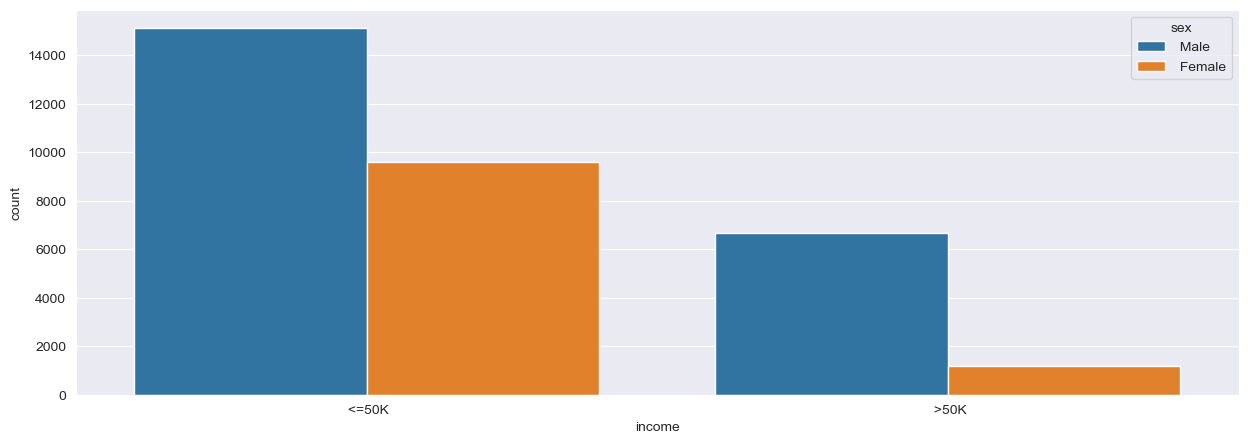

In [8]:
sns.countplot(x = adultData["income"], hue = "sex", data = adultData)
plt.show()

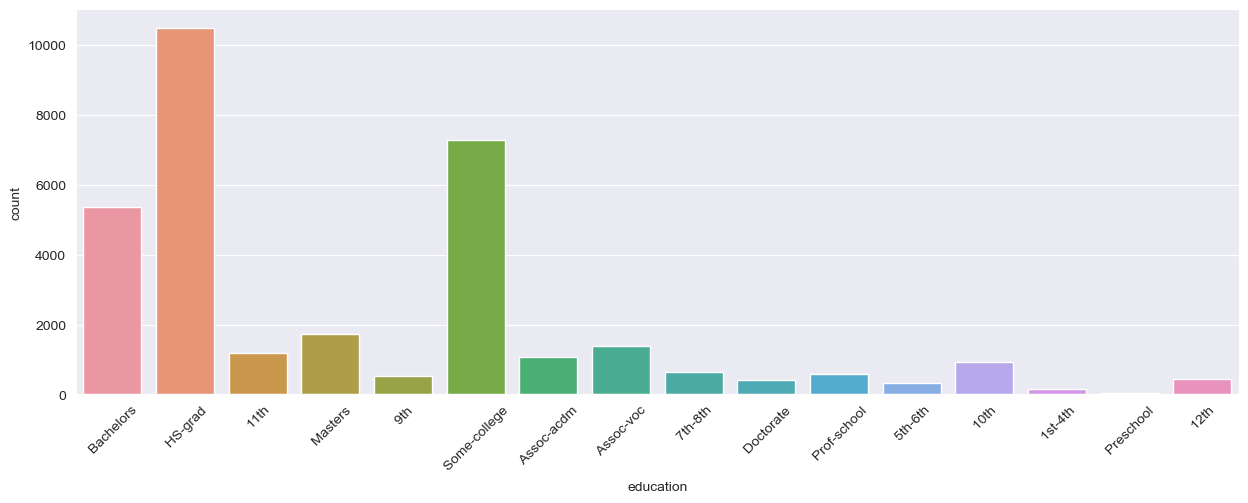

In [9]:
sns.countplot(x = adultData["education"])
plt.xticks(rotation = 45)
plt.show()

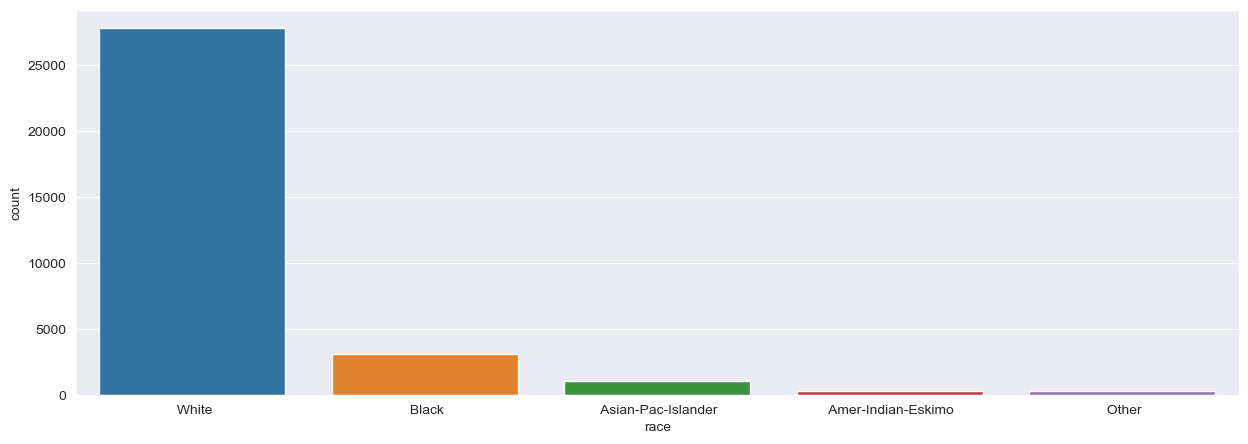

In [10]:
sns.countplot(x = adultData["race"])
plt.show()

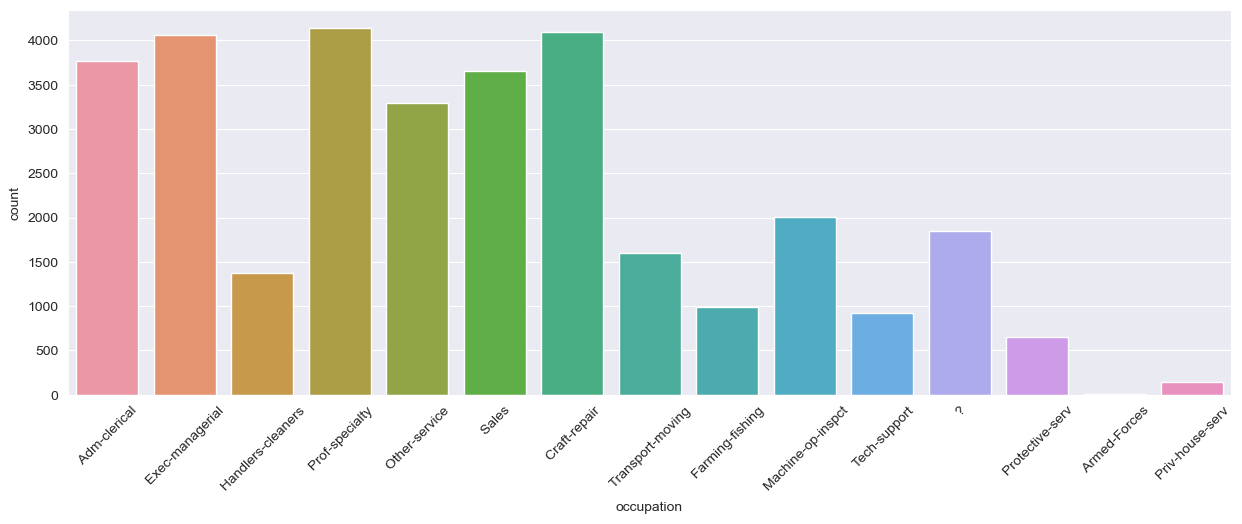

In [11]:
sns.countplot(x = adultData["occupation"])
plt.xticks(rotation = 45)
plt.show()

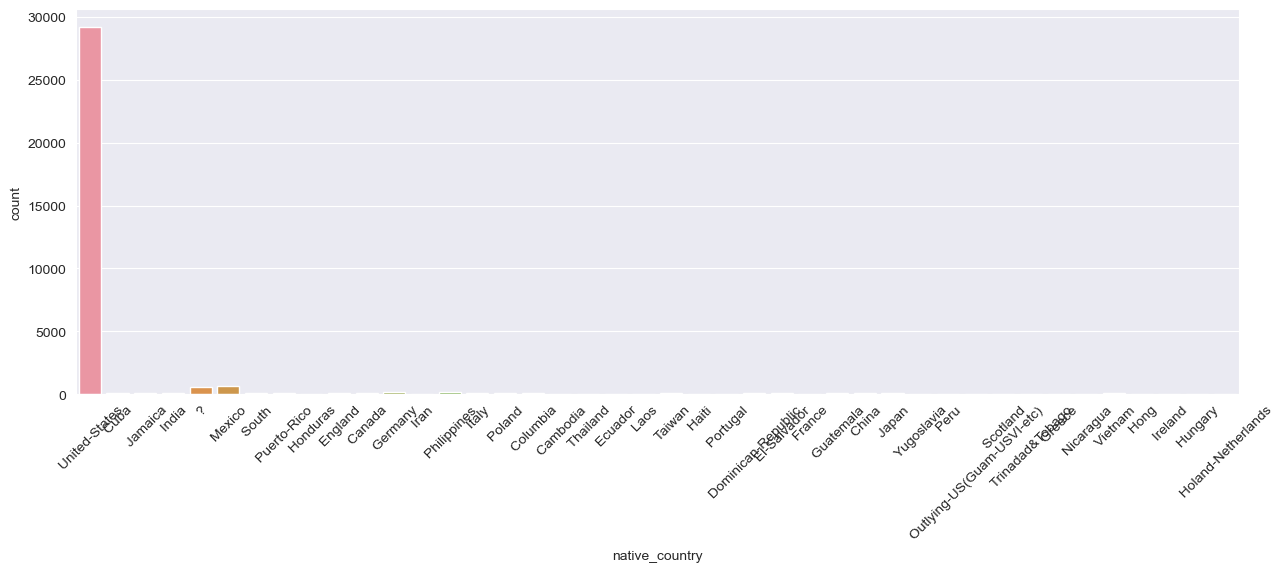

In [12]:
sns.countplot(x = adultData["native_country"])
plt.xticks(rotation = 45)
plt.show()

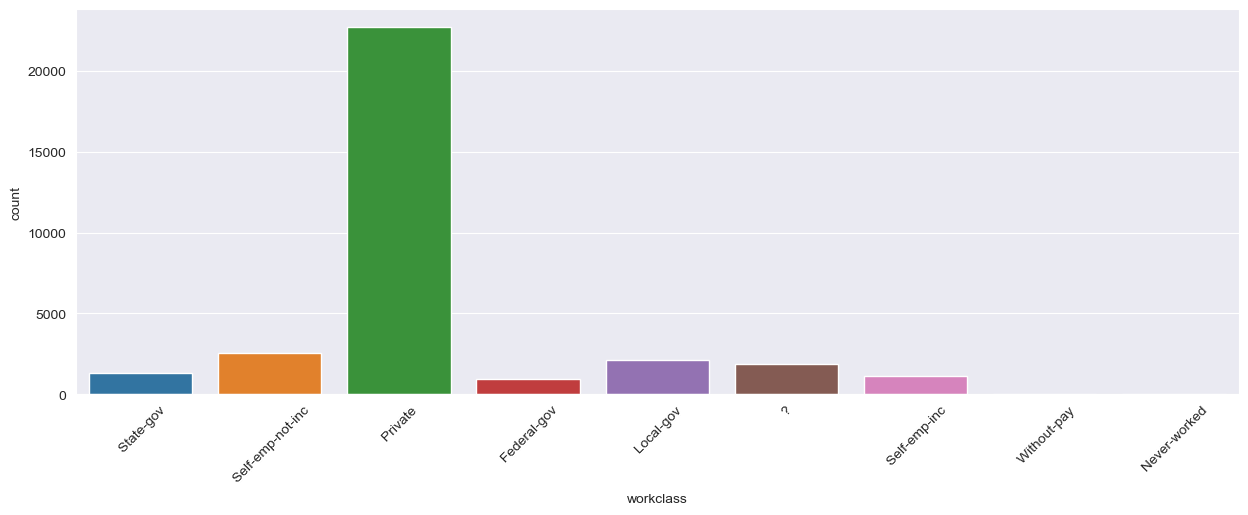

In [13]:
sns.countplot(x = adultData["workclass"])
plt.xticks(rotation = 45)
plt.show()

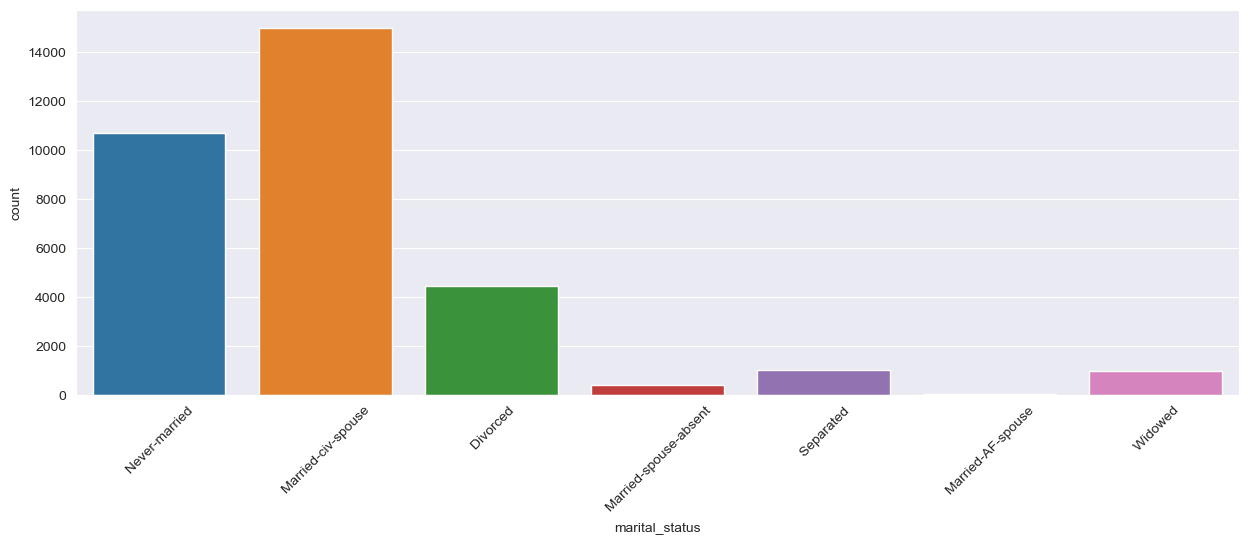

In [14]:
sns.countplot(x = adultData["marital_status"])
plt.xticks(rotation = 45)
plt.show()

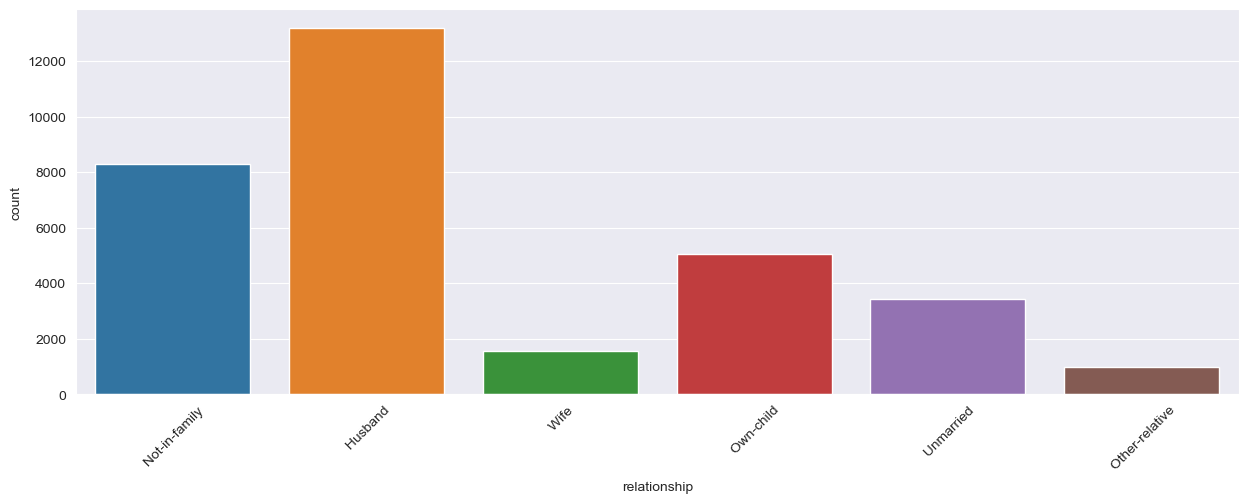

In [15]:
sns.countplot(x = adultData["relationship"])
plt.xticks(rotation = 45)
plt.show()

In [16]:
adultData["occupation"] = adultData["occupation"].replace(" ?",np.NaN)
adultData["workclass"] = adultData["workclass"].replace(" ?", np.NaN)
adultData["native_country"] = adultData["native_country"].replace(" ?", np.NaN)

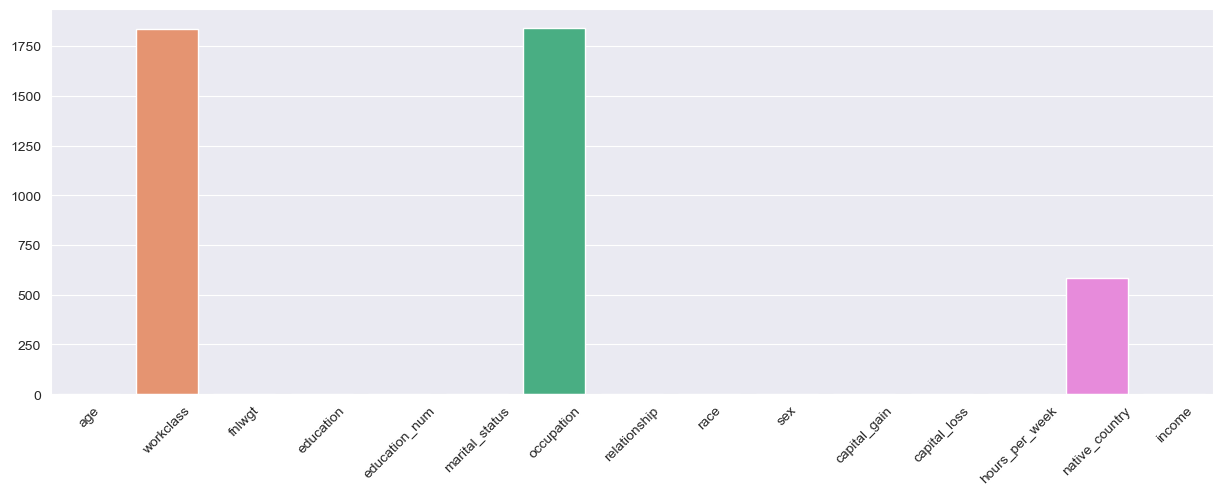

In [17]:
sns.barplot(x = adultData.columns, y = adultData.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

In [18]:
adultData[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [19]:
for i in numerical:
    if not adultData[adultData[i] == " ?"].empty:
        print(f"{i} contains missing values ( ?)")
    else:
        print("no missing values")

no missing values
no missing values
no missing values
no missing values
no missing values
no missing values


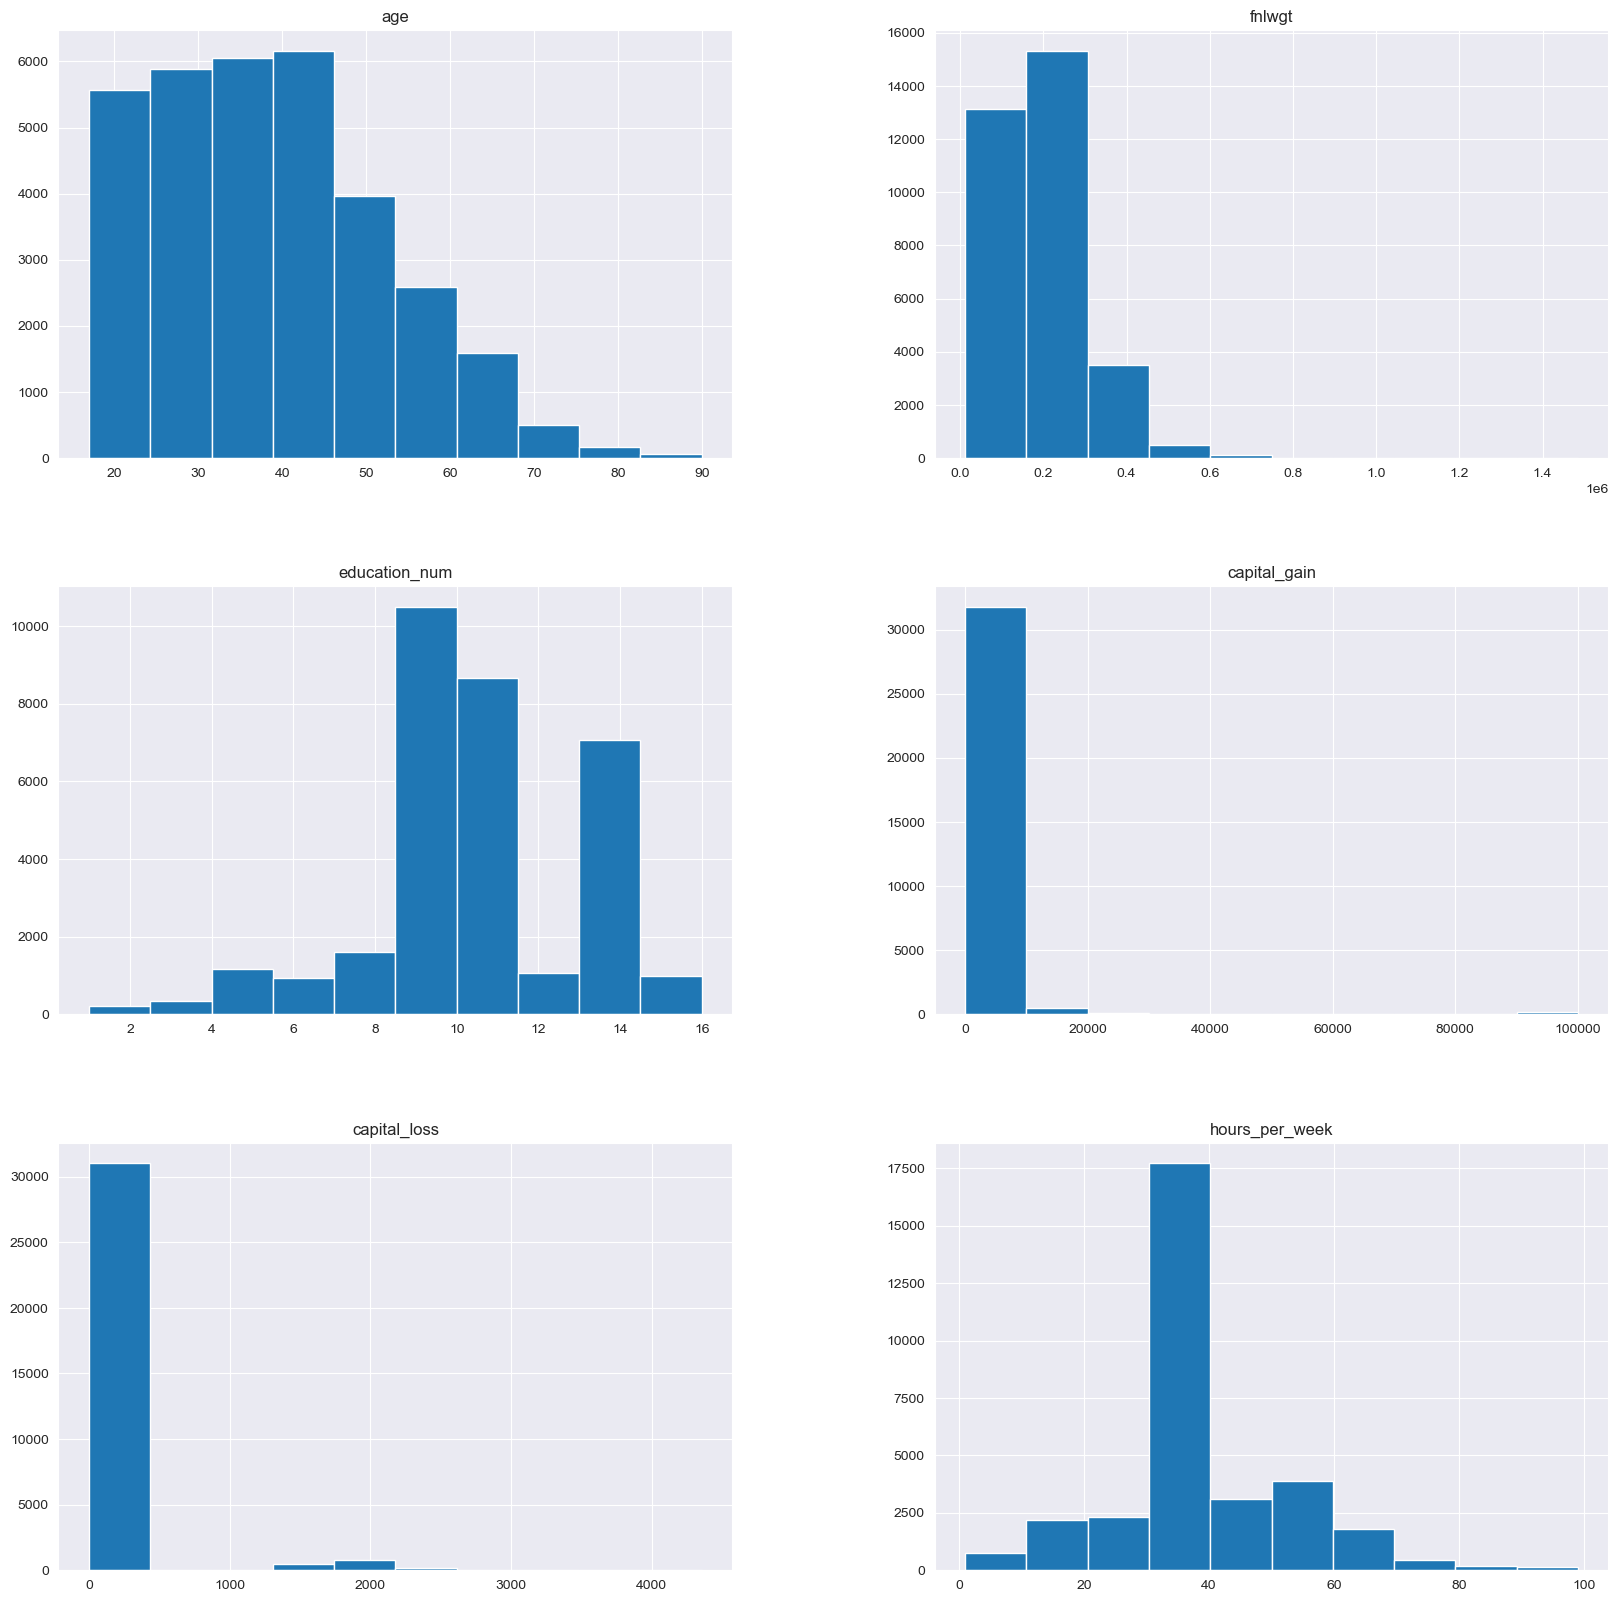

In [20]:
adultData[numerical].hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

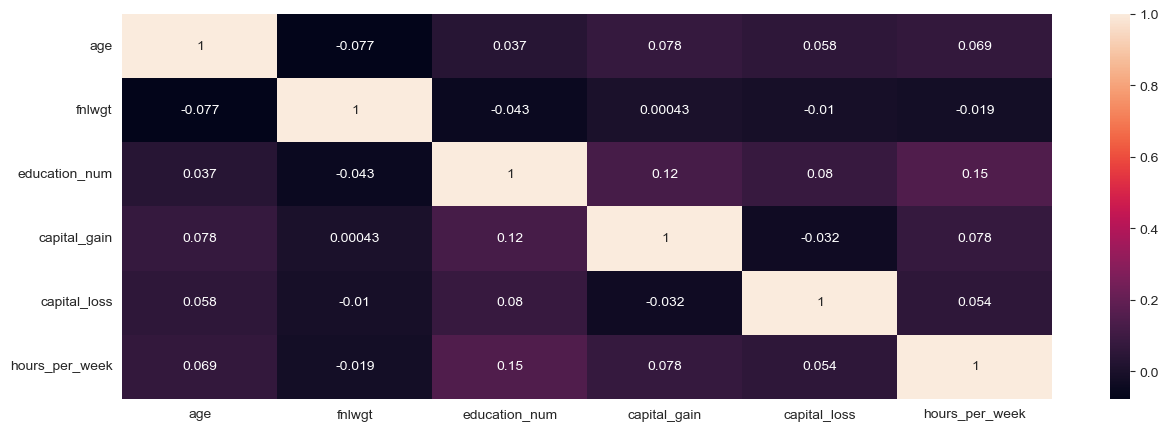

In [22]:
sns.heatmap(adultData[numerical].corr(), annot=True)

In [23]:
adultData["workclass"].fillna(adultData["workclass"].mode()[0], inplace = True)
adultData["occupation"].fillna(adultData["occupation"].mode()[0], inplace = True)
adultData["native_country"].fillna(adultData["native_country"].mode()[0], inplace = True)

In [24]:
adultData = pd.get_dummies(data = adultData, columns = categorical, drop_first=True)
adultData.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
adultData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 98 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education_num                               32561 non-null  int64
 3   capital_gain                                32561 non-null  int64
 4   capital_loss                                32561 non-null  int64
 5   hours_per_week                              32561 non-null  int64
 6   workclass_ Local-gov                        32561 non-null  uint8
 7   workclass_ Never-worked                     32561 non-null  uint8
 8   workclass_ Private                          32561 non-null  uint8
 9   workclass_ Self-emp-inc                     32561 non-null  uint8
 10  workclass_ Self-emp-not-inc       

In [26]:
adultData.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.064279,0.000215,0.753417,0.034274,...,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.913762,0.002058,0.000491,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.245254,0.014661,0.431029,0.181935,...,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.280720,0.045316,0.022162,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
from sklearn.preprocessing import RobustScaler
x = adultData.drop("income_ >50K", axis = 1)
y = adultData["income_ >50K"]

scaler = RobustScaler()
x_scaled = scaler.fit_transform(x[numerical])
x[numerical] = x_scaled

In [28]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 97 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         32561 non-null  float64
 1   fnlwgt                                      32561 non-null  float64
 2   education_num                               32561 non-null  float64
 3   capital_gain                                32561 non-null  float64
 4   capital_loss                                32561 non-null  float64
 5   hours_per_week                              32561 non-null  float64
 6   workclass_ Local-gov                        32561 non-null  uint8  
 7   workclass_ Never-worked                     32561 non-null  uint8  
 8   workclass_ Private                          32561 non-null  uint8  
 9   workclass_ Self-emp-inc                     32561 non-null  uint8  
 10  workclass_

In [30]:
x.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
age,1.000000,-0.076646,0.036527,0.077674,5.777454e-02,0.068756,0.060901,-0.019362,-0.188702,0.102692,...,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.017993,-1.505357e-02,0.000375
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-1.025171e-02,-0.018768,-0.002828,0.005031,0.044182,-0.024626,...,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.079790,-1.139827e-02,0.005501
education_num,0.036527,-0.043195,1.000000,0.122630,7.992296e-02,0.148123,0.097941,-0.015117,-0.168038,0.077358,...,-0.044286,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.122965,-7.483035e-03,-0.001234
capital_gain,0.077674,0.000432,0.122630,1.000000,-3.161506e-02,0.078409,-0.007007,-0.002140,-0.049602,0.096885,...,-0.003879,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.011299,-2.564276e-03,-0.002193
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000e+00,0.054256,0.014668,-0.003177,-0.037895,0.031714,...,-0.007308,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.014458,-5.997599e-07,-0.004804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_country_ Thailand,-0.006271,-0.001250,0.007896,-0.003432,-5.095482e-03,0.009537,-0.006164,-0.000345,-0.007765,0.017114,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.076555,-1.067931e-03,-0.000521
native_country_ Trinadad&Tobago,0.004843,0.005273,-0.017071,-0.003526,8.102329e-03,-0.006006,-0.001148,-0.000354,0.002021,0.002438,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.078654,-1.097212e-03,-0.000536
native_country_ United-States,0.017993,-0.079790,0.122965,0.011299,1.445832e-02,0.008217,0.031002,0.004505,-0.047061,0.007963,...,-0.109791,-0.192944,-0.062501,-0.161546,-0.128927,-0.076555,-0.078654,1.000000,-1.478096e-01,-0.072175
native_country_ Vietnam,-0.015054,-0.011398,-0.007483,-0.002564,-5.997599e-07,-0.011379,-0.003611,-0.000666,0.008681,-0.004829,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.147810,1.000000e+00,-0.001007


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [33]:
y_pred = gnb.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
print("Model accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.8201


In [35]:
y_pred_train = gnb.predict(x_train)
print("Training set score: {:.4f}".format(gnb.score(x_train,y_train)))
print("test set score: {:.4f}".format(gnb.score(x_test,y_test)))

Training set score: 0.8264
test set score: 0.8201


In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6324 1073]
 [ 684 1688]]
True Positives(TP) =  6324
True Negatives(TN) =  1688
False Positives(FP) =  1073
False Negatives(FN) =  684


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      7397
           1       0.61      0.71      0.66      2372

    accuracy                           0.82      9769
   macro avg       0.76      0.78      0.77      9769
weighted avg       0.83      0.82      0.82      9769



In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.8245614  0.83157895 0.82053532 0.82009653 0.82887231 0.81570864
 0.82667837 0.82799473 0.82623958 0.82667837]

Average cross-validation score: 0.8249


In [47]:
#changing train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y, test_size = 0.40)
gnb2 = GaussianNB()
gnb2.fit(x2_train,y2_train)
y2_pred = gnb.predict(x2_test)
print(classification_report(y2_test, y2_pred))
#better accuract with train size =0.6, test size = 0.4

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9944
           1       0.61      0.72      0.66      3081

    accuracy                           0.83     13025
   macro avg       0.76      0.79      0.77     13025
weighted avg       0.84      0.83      0.83     13025



In [48]:
cm = confusion_matrix(y2_test, y2_pred)

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8516 1428]
 [ 848 2233]]
True Positives(TP) =  8516
True Negatives(TN) =  2233
False Positives(FP) =  1428
False Negatives(FN) =  848
